<a href="https://colab.research.google.com/github/nilesh2gupta/UBC_project/blob/main/Knowledge_graph_testing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import spacy
nlp = spacy.load("en_core_web_sm")
text = "Narendra Modi is a prime minister of india"
doc = nlp(text)
for entity in doc.ents:
    print(entity.text, entity.label_)


Narendra Modi PERSON
india GPE


In [ ]:
!pip install wikipedia-api
!pip install newspaper3k


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.1/211.1 kB 1.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.3/81.3 kB 8.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 97.6/97.6 kB 8.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.4/7.4 MB 31.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Created wheel for tinysegmenter: filename=tinysegmenter-0.3-py3-none-any.whl size=13538 sha256=c254d31938ad47b6a92c4643b4ed967a42a04a66dcf9b1c6d93feaed791f65e4
  Stored in directory: /root/.cache/pip/wheels/c8/d6/6c/384f58df48c00b9a31d638005143b5b3ac62c3d25fb1447f23
  Created wheel for feedfinder2: filename=feedfinder2-0.0.4-py3-none-any.whl size=3340 sha256=bf17cbeb49be97964c488067be38cf84838c2f9476281e709e9e381e96bb9b65
  Stored in directory: /root/.cache/pip/wheels/97/02/e7/a1ff1760e12bdbaab0ac824fae5c1bc

In [ ]:
import wikipediaapi
from newspaper import Article
import re

def fetch_wikipedia_summary(topic):
    wiki = wikipediaapi.Wikipedia('MyWikiFetcher/1.0 (nilegupta2001@gmail.com)')
    page = wiki.page(topic)
    if page.exists():
        return page.summary
    return None

def extract_article_text(url):
    article = Article(url)
    article.download()
    article.parse()
    return article.text

def get_summary(input_text):
    wiki_summary = fetch_wikipedia_summary(input_text)
    if wiki_summary:
        str= 'https://en.wikipedia.org/wiki/'
        url = str + input_text
        print(extract_article_text(url))
        return wiki_summary



user_input = input("Enter the news: ")
summary = get_summary(user_input)
print(summary)


Enter the news: apple company
American multinational technology company

Apple Inc. is an American multinational corporation and technology company headquartered in Cupertino, California, in Silicon Valley. It designs, develops, and sells consumer electronics, computer software, and online services. Devices include the iPhone, iPad, Mac, Apple Watch, Vision Pro, and Apple TV; operating systems include iOS, iPadOS, macOS, watchOS, tvOS, and visionOS; and software applications and services include iTunes, iCloud, Apple Music, and Apple TV+.

Since 2011, Apple has been the world's largest company by market capitalization except when Microsoft held the position between January and June 2024.[6][7][8] In 2022, Apple was the largest technology company by revenue, with US$394.3 billion.[9][failed verification] As of 2023 , Apple was the fourth-largest personal computer vendor by unit sales,[10] the largest manufacturing company by revenue, and the largest vendor of mobile phones in the world.

In [ ]:
from transformers import pipeline
sentiment_pipeline = pipeline("sentiment-analysis")

sentences = ["earth temperature is increasing by one degree every year"]
results = sentiment_pipeline(sentences)

for sentence, result in zip(sentences, results):
    print(f"Sentence: {sentence}")
    print(f"Sentiment: {result['label']}, Score: {result['score']:.4f}")
    print()


No model was supplied, defaulted to distilbert/distilbert-base-uncased-finetuned-sst-2-english and revision af0f99b (https://huggingface.co/distilbert/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.


Sentence: earth temperature is increasing by one degree every year
Sentiment: POSITIVE, Score: 0.9145



In [ ]:
from transformers import pipeline
emotion_pipeline = pipeline("text-classification", model="j-hartmann/emotion-english-distilroberta-base", return_all_scores=True)

def predict_emotion(sentence):
    results = emotion_pipeline(sentence)
    max_score = 0
    predicted_emotion = None
    for emotion_result in results[0]:
        if emotion_result['score'] > max_score:
            max_score = emotion_result['score']
            predicted_emotion = emotion_result['label']
    return predicted_emotion



/usr/local/lib/python3.10/dist-packages/transformers/pipelines/text_classification.py:104: UserWarning: `return_all_scores` is now deprecated,  if want a similar functionality use `top_k=None` instead of `return_all_scores=True` or `top_k=1` instead of `return_all_scores=False`.
  warnings.warn(


In [ ]:
predict_emotion('''It's infuriating how some people spread blatant lies about climate change, denying scientific evidence and misleading others, while our planet suffers the devastating consequences of their ignorance and selfishness, pushing us closer to environmental catastrophe with every false claim they propagate.''')

'anger'

In [ ]:
!pip install spacy networkx
!pip install spacy spacy-entity-linker wikipedia-api
!pip install mwparserfromhell
!pip install wptools
!pip install torch_geometric

  Preparing metadata (setup.py) ... done
  Created wheel for spacy-entity-linker: filename=spacy_entity_linker-1.0.3-py3-none-any.whl size=14375 sha256=06e958a5ab85771ff32e40603a3a7bfee57c8ad0690fd06436e55d0217651012
  Stored in directory: /root/.cache/pip/wheels/6d/73/f9/568b5f541ed2d6f9adb8556b8ef9995e5528f3f9ab2b83b196
Successfully built spacy-entity-linker
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 191.0/191.0 kB 4.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.5/56.5 kB 3.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.6/4.6 MB 44.1 MB/s eta 0:00:00
  Created wheel for html2text: filename=html2text-2024.2.26-py3-none-any.whl size=33111 sha256=7c1896f56cc7ed0560199048a42bf4c51bbe5baee4eefea26baa2cd6823f7035
  Stored in directory: /root/.cache/pip/wheels/f3/96/6d/a7eba8f80d31cbd188a2787b81514d82fc5ae6943c44777659
Successfully built html2text
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 12

#Coarse grained knowledge graph

Some weights of RobertaModel were not initialized from the model checkpoint at roberta-base and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Contextual Vectors shape: torch.Size([71, 768])
Contextual Vectors: tensor([[ 0.5555,  0.2232, -0.4668,  ..., -0.0544, -0.1244,  0.3711],
        [ 0.5513,  0.1968, -0.4635,  ..., -0.0671, -0.1172,  0.3747],
        [ 0.5444,  0.1916, -0.4584,  ..., -0.0838, -0.1137,  0.3779],
        ...,
        [ 0.5460,  0.2319, -0.4588,  ..., -0.0876, -0.1122,  0.3720],
        [ 0.5329,  0.2321, -0.4581,  ..., -0.1012, -0.1129,  0.3897],
        [ 0.5287,  0.2286, -0.4551,  ..., -0.1112, -0.1095,  0.3984]])


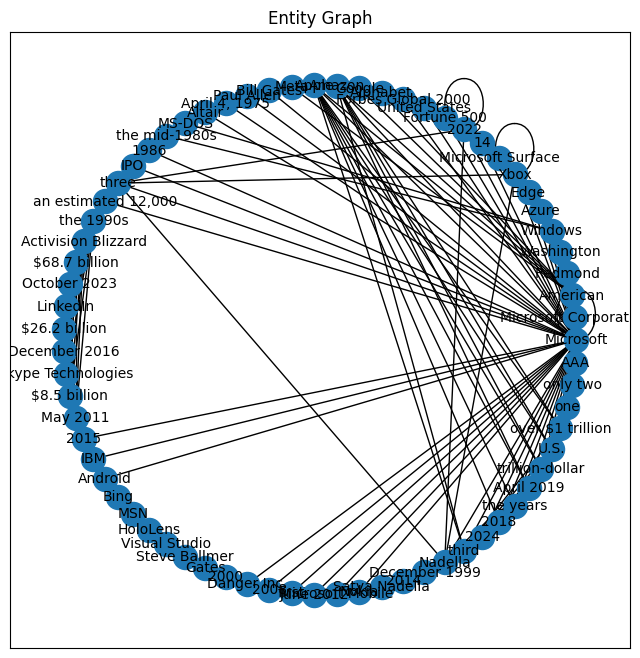

In [ ]:
import spacy
import requests
import wptools
import networkx as nx
import matplotlib.pyplot as plt
from transformers import RobertaTokenizer, RobertaModel
import torch
import torch.nn.functional as F
from torch_geometric.data import Data
from torch_geometric.nn import GATConv
import numpy as np
import wikipediaapi

# Loading Spacy model
nlp = spacy.load("en_core_web_sm")

# Sample news text
news_text = "Microsoft is the largest software comapny"

def get_wikipedia_url(entity):
    url = f"https://en.wikipedia.org/wiki/{entity.replace(' ', '_')}"
    return url

def get_wikipedia_summary(entity):
    url = f"https://en.wikipedia.org/api/rest_v1/page/summary/{entity.replace(' ', '_')}"
    response = requests.get(url)
    if response.status_code == 200:
        data = response.json()
        return data.get('extract')
    return None

def augment_news_with_entities(news_text, entity_summaries):
    augmented_text = news_text
    for entity, summary in entity_summaries.items():
        if summary:
            augmented_text += f"\n\n {entity}: {summary}"
    return augmented_text

def fetch_wikipedia_summary(topic):
    wiki = wikipediaapi.Wikipedia('MyWikiFetcher/1.0 (nilegupta2001@gmail.com)')
    page = wiki.page(topic)
    if page.exists():
        return page.summary
    return None

def get_infobox(title):
    try:
        page = wptools.page(title)
        page.get_parse()
        infobox = page.data.get('infobox')
        return infobox
    except:
        return None

def get_roberta_embeddings(text):
    inputs = tokenizer(text, return_tensors='pt', truncation=True, padding=True, max_length=512)
    with torch.no_grad():
        outputs = model(**inputs)
    return outputs.last_hidden_state.mean(dim=1).squeeze().numpy()

# Loading RoBERTa tokenizer and model
tokenizer = RobertaTokenizer.from_pretrained('roberta-base')
model = RobertaModel.from_pretrained('roberta-base')

# Extracting entities from the news text
doc = nlp(news_text)
entities = [(ent.text, ent.label_) for ent in doc.ents]

linked_entities = {entity: get_wikipedia_url(entity) for entity, label in entities}
entity_summaries = {entity: fetch_wikipedia_summary(entity) for entity in linked_entities.keys()}

augmented_news = augment_news_with_entities(news_text, entity_summaries)

# Extracting entities from the augmented news text
doc = nlp(augmented_news)
entities = [(ent.text, ent.label_) for ent in doc.ents]
linked_entities = {entity: get_wikipedia_url(entity) for entity, label in entities}

# Creating an undirected graph
G = nx.Graph()

for entity, url in linked_entities.items():
    embedding = get_roberta_embeddings(entity)
    G.add_node(entity, url=url, embedding=embedding)

for sent in doc.sents:
    sent_entities = [ent.text for ent in sent.ents]
    for i, entity1 in enumerate(sent_entities):
        for entity2 in sent_entities[i+1:]:
            if G.has_node(entity1) and G.has_node(entity2):
                G.add_edge(entity1, entity2)

# Converting adjacency matrix to edge index format required by PyTorch Geometric
# Converting node names to numeric indices
node_to_idx = {node: idx for idx, node in enumerate(G.nodes())}
edge_list = nx.to_edgelist(G)
edge_index = torch.tensor([[node_to_idx[u], node_to_idx[v]] for u, v, _ in edge_list], dtype=torch.long).t().contiguous()

# Converting node features to torch tensor
node_features = np.array([node[1]['embedding'] for node in G.nodes(data=True)])
node_features = torch.tensor(node_features, dtype=torch.float)

# Creating a PyTorch Geometric data object
data = Data(x=node_features, edge_index=edge_index)

# Defining GAT model
class GATModel(torch.nn.Module):
    def __init__(self, in_dim, hidden_dim, out_dim, num_heads):
        super(GATModel, self).__init__()
        self.conv1 = GATConv(in_dim, hidden_dim, heads=num_heads, dropout=0.6)
        self.conv2 = GATConv(hidden_dim * num_heads, out_dim, heads=1, dropout=0.6)

    def forward(self, data):
        x, edge_index = data.x, data.edge_index
        x = F.dropout(x, p=0.6, training=self.training)
        x = F.elu(self.conv1(x, edge_index))
        x = F.dropout(x, p=0.6, training=self.training)
        x = self.conv2(x, edge_index)
        return x

# Initialize the model
in_dim = node_features.shape[1]
hidden_dim = 96
out_dim = 768
num_heads = 8

model = GATModel(in_dim, hidden_dim, out_dim, num_heads)

model.eval()
with torch.no_grad():
    contextual_vectors = model(data)

print("Contextual Vectors shape:", contextual_vectors.shape)
print("Contextual Vectors:", contextual_vectors)

# Plot the graph
plt.figure(figsize=(8, 8))
pos = nx.circular_layout(G)

nx.draw_networkx_nodes(G, pos, node_size=300)

nx.draw_networkx_edges(G, pos, width=1)

nx.draw_networkx_labels(G, pos, font_size=10, font_family='sans-serif')

# Display the plot
plt.title("Coarse Grained Knowledge Graph")
plt.show()

#Fine Grained Knowledge graph

Some weights of RobertaModel were not initialized from the model checkpoint at roberta-base and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
en.wikipedia.org (parse) Microsoft
en.wikipedia.org (imageinfo) File:Aerial Microsoft West Campus Au...
Microsoft (en) data
{
  image: <list(1)> {'kind': 'parse-image', 'file': 'File:Aerial Mi...
  infobox: <dict(38)> name, logo, logo_size, logo_alt, image, imag...
  iwlinks: <list(4)> https://commons.wikimedia.org/wiki/Category:M...
  pageid: 19001
  parsetree: <str(241768)> <root><template><title>Short descriptio...
  requests: <list(2)> parse, imageinfo
  title: Microsoft
  wikibase: Q2283
  wikidata_url: https://www.wikidata.org/wiki/Q2283
  wikitext: <str(206039)> {{Short description|American multination...
}


Contextual Vectors shape: torch.Size([29, 768])
Contextual Vectors: tensor([[-0.6394, -0.4757, -0.4158,  ...,  0.2067, -0.5203,  0.1483],
        [-0.6223, -0.4533, -0.4042,  ...,  0.1889, -0.5313,  0.0864],
        [-0.6258, -0.4516, -0.3977,  ...,  0.1734, -0.5354,  0.0602],
        ...,
        [-0.5524, -0.4897, -0.2084,  ...,  0.0312, -0.6537, -0.1664],
        [-0.5662, -0.4511, -0.2452,  ...,  0.0795, -0.5760, -0.0673],
        [-0.5585, -0.3576, -0.4170,  ...,  0.0071, -0.4954, -0.0203]])


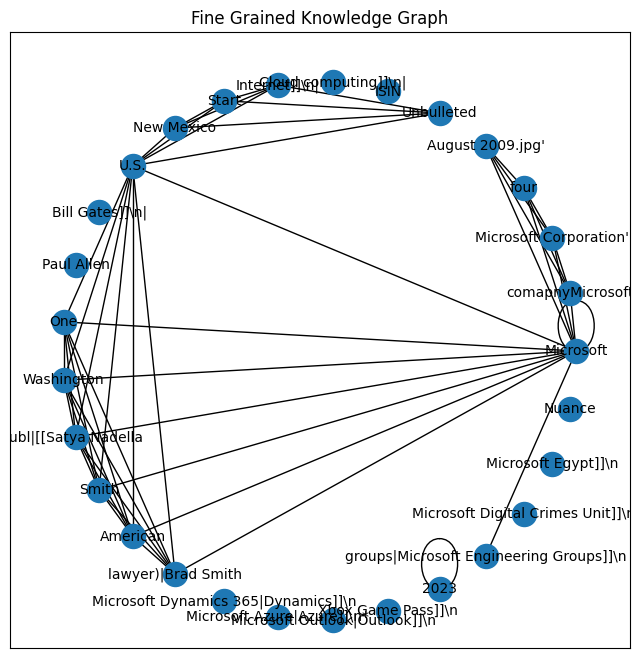

In [ ]:
import spacy
import requests
import wptools
import networkx as nx
import matplotlib.pyplot as plt
from transformers import RobertaTokenizer, RobertaModel
import torch
import torch.nn.functional as F
from torch_geometric.data import Data
from torch_geometric.nn import GATConv
import numpy as np
import wikipediaapi

# Loading Spacy model
nlp = spacy.load("en_core_web_sm")

# Sample news text
news_text = "Microsoft is the largest software comapny"

def get_wikipedia_url(entity):
    url = f"https://en.wikipedia.org/wiki/{entity.replace(' ', '_')}"
    return url

def get_wikipedia_summary(entity):
    url = f"https://en.wikipedia.org/api/rest_v1/page/summary/{entity.replace(' ', '_')}"
    response = requests.get(url)
    if response.status_code == 200:
        data = response.json()
        return data.get('extract')
    return None

def augment_news_with_entities(news_text, entity_summaries):
    augmented_text = news_text
    for entity, summary in entity_summaries.items():
        if summary:
            augmented_text += f"{entity}: {summary}"
    return augmented_text

def fetch_wikipedia_summary(topic):
    wiki = wikipediaapi.Wikipedia('MyWikiFetcher/1.0 (nilegupta2001@gmail.com)')
    page = wiki.page(topic)
    if page.exists():
        return page.summary
    return None

def get_infobox(title):
    try:
        page = wptools.page(title)
        page.get_parse()
        infobox = page.data.get('infobox')
        return infobox
    except:
        return None

def get_roberta_embeddings(text):
    inputs = tokenizer(text, return_tensors='pt', truncation=True, padding=True, max_length=512)
    with torch.no_grad():
        outputs = model(**inputs)
    return outputs.last_hidden_state.mean(dim=1).squeeze().numpy()

# Loading RoBERTa tokenizer and model
tokenizer = RobertaTokenizer.from_pretrained('roberta-base')
model = RobertaModel.from_pretrained('roberta-base')

# Extracting entities from the news text
doc = nlp(news_text)
entities = [(ent.text, ent.label_) for ent in doc.ents]

linked_entities = {entity: get_wikipedia_url(entity) for entity, label in entities}
entity_summaries = {entity: get_infobox(entity) for entity in linked_entities.keys()}

augmented_news = augment_news_with_entities(news_text, entity_summaries)

# Extracting entities from the augmented news text
doc = nlp(augmented_news)
entities = [(ent.text, ent.label_) for ent in doc.ents]
linked_entities = {entity: get_wikipedia_url(entity) for entity, label in entities}

# Creating an undirected graph
G = nx.Graph()

for entity, url in linked_entities.items():
    embedding = get_roberta_embeddings(entity)
    G.add_node(entity, url=url, embedding=embedding)

for sent in doc.sents:
    sent_entities = [ent.text for ent in sent.ents]
    for i, entity1 in enumerate(sent_entities):
        for entity2 in sent_entities[i+1:]:
            if G.has_node(entity1) and G.has_node(entity2):
                G.add_edge(entity1, entity2)

# Converting adjacency matrix to edge index format required by PyTorch Geometric
# Converting node names to numeric indices
node_to_idx = {node: idx for idx, node in enumerate(G.nodes())}
edge_list = nx.to_edgelist(G)
edge_index = torch.tensor([[node_to_idx[u], node_to_idx[v]] for u, v, _ in edge_list], dtype=torch.long).t().contiguous()

# Converting node features to torch tensor
node_features = np.array([node[1]['embedding'] for node in G.nodes(data=True)])
node_features = torch.tensor(node_features, dtype=torch.float)

# Creating a PyTorch Geometric data object
data = Data(x=node_features, edge_index=edge_index)

# Defining GAT model
class GATModel(torch.nn.Module):
    def __init__(self, in_dim, hidden_dim, out_dim, num_heads):
        super(GATModel, self).__init__()
        self.conv1 = GATConv(in_dim, hidden_dim, heads=num_heads, dropout=0.6)
        self.conv2 = GATConv(hidden_dim * num_heads, out_dim, heads=1, dropout=0.6)

    def forward(self, data):
        x, edge_index = data.x, data.edge_index
        x = F.dropout(x, p=0.6, training=self.training)
        x = F.elu(self.conv1(x, edge_index))
        x = F.dropout(x, p=0.6, training=self.training)
        x = self.conv2(x, edge_index)
        return x

# Initialize the model
in_dim = node_features.shape[1]
hidden_dim = 96
out_dim = 768
num_heads = 8

model = GATModel(in_dim, hidden_dim, out_dim, num_heads)

model.eval()
with torch.no_grad():
    contextual_vectors = model(data)

print("Contextual Vectors shape:", contextual_vectors.shape)
print("Contextual Vectors:", contextual_vectors)

# Plot the graph
plt.figure(figsize=(8, 8))
pos = nx.circular_layout(G)

nx.draw_networkx_nodes(G, pos, node_size=300)

nx.draw_networkx_edges(G, pos, width=1)

nx.draw_networkx_labels(G, pos, font_size=10, font_family='sans-serif')

# Display the plot
plt.title("Fine Grained Knowledge Graph")
plt.show()

#Weight of egdes after GAT

Some weights of RobertaModel were not initialized from the model checkpoint at roberta-base and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Number of nodes: 71
Number of edges: 205
Contextual Vectors shape: torch.Size([71, 768])
Contextual Vectors: tensor([[ 3.5713e-01, -5.5159e-01,  9.9362e-02,  ..., -9.6360e-02,
         -4.2920e-01, -1.2192e-02],
        [ 3.6971e-01, -5.3638e-01,  1.0145e-01,  ..., -9.3330e-02,
         -3.9561e-01, -1.1721e-03],
        [ 3.7907e-01, -5.3566e-01,  1.0061e-01,  ..., -9.5052e-02,
         -3.8825e-01,  1.1823e-04],
        ...,
        [ 3.7290e-01, -5.7258e-01,  9.3726e-02,  ..., -1.1765e-01,
         -4.2935e-01, -3.1999e-02],
        [ 3.8155e-01, -5.7981e-01,  8.9656e-02,  ..., -1.2946e-01,
         -4.2933e-01, -3.3394e-02],
        [ 3.8807e-01, -5.8277e-01,  8.6274e-02,  ..., -1.3075e-01,
         -4.2920e-01, -3.1780e-02]])
Edge Weights from Second Layer: (tensor([[ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
          0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
          0,  0,  0,  0,  0,  0,  0,  0,  1,  1,  1,  2,  2,  2,

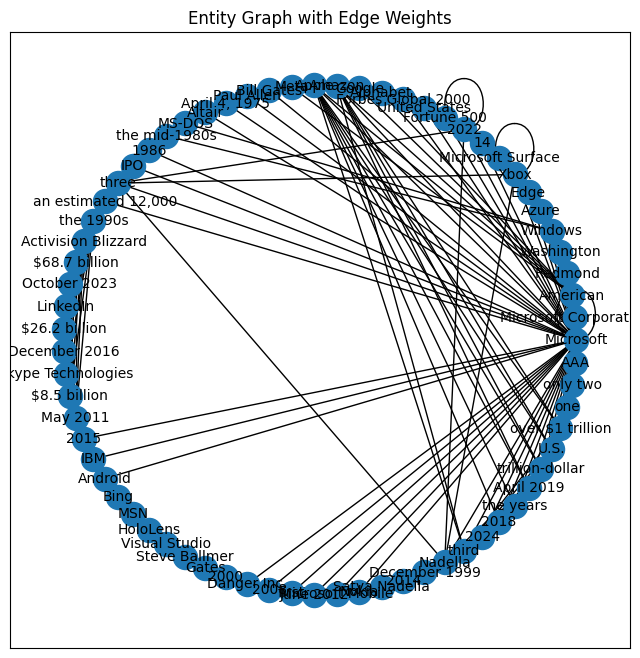

In [ ]:
import spacy
import requests
import wptools
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
import torch
import torch.nn.functional as F
from torch_geometric.data import Data
from torch_geometric.nn import GATConv
from transformers import RobertaTokenizer, RobertaModel
import wikipediaapi

# Loading Spacy model
nlp = spacy.load("en_core_web_sm")

# Loading RoBERTa tokenizer and model
tokenizer = RobertaTokenizer.from_pretrained('roberta-base')
model = RobertaModel.from_pretrained('roberta-base')

# Sample news text
news_text = "Microsoft is the largest software company"

# Function to get Wikipedia URL for an entity
def get_wikipedia_url(entity):
    url = f"https://en.wikipedia.org/wiki/{entity.replace(' ', '_')}"
    return url

# Function to get Wikipedia summary for an entity
def fetch_wikipedia_summary(topic):
    wiki = wikipediaapi.Wikipedia('MyWikiFetcher/1.0 (nilegupta2001@gmail.com)')
    page = wiki.page(topic)
    if page.exists():
        return page.summary
    return None

# Function to fetch infobox from Wikipedia page
def get_infobox(title):
    try:
        page = wptools.page(title)
        page.get_parse()
        infobox = page.data.get('infobox')
        return infobox
    except Exception as e:
        print(f"Error fetching infobox for '{title}': {str(e)}")
        return None

# Function to get RoBERTa embeddings for text
def get_roberta_embeddings(text):
    inputs = tokenizer(text, return_tensors='pt', truncation=True, padding=True, max_length=512)
    with torch.no_grad():
        outputs = model(**inputs)
    return outputs.last_hidden_state.mean(dim=1).squeeze().numpy()

# Extracting entities from the news text
doc = nlp(news_text)
entities = [(ent.text, ent.label_) for ent in doc.ents]

linked_entities = {entity: get_wikipedia_url(entity) for entity, label in entities}
entity_summaries = {entity: fetch_wikipedia_summary(entity) for entity in linked_entities.keys()}

# Augmenting news text with entity summaries
def augment_news_with_entities(news_text, entity_summaries):
    augmented_text = news_text
    for entity, summary in entity_summaries.items():
        if summary:
            augmented_text += f"\n\n {entity}: {summary}"
    return augmented_text

augmented_news = augment_news_with_entities(news_text, entity_summaries)

# Extracting entities from the augmented news text
doc = nlp(augmented_news)
entities = [(ent.text, ent.label_) for ent in doc.ents]
linked_entities = {entity: get_wikipedia_url(entity) for entity, label in entities}

# Creating an undirected graph
G = nx.Graph()

for entity, url in linked_entities.items():
    embedding = get_roberta_embeddings(entity)
    G.add_node(entity, url=url, embedding=embedding)

for sent in doc.sents:
    sent_entities = [ent.text for ent in sent.ents]
    for i, entity1 in enumerate(sent_entities):
        for entity2 in sent_entities[i+1:]:
            if G.has_node(entity1) and G.has_node(entity2):
                G.add_edge(entity1, entity2)

# Converting adjacency matrix to edge index format required by PyTorch Geometric
node_to_idx = {node: idx for idx, node in enumerate(G.nodes())}
edge_list = nx.to_edgelist(G)
edge_index = torch.tensor([[node_to_idx[u], node_to_idx[v]] for u, v, _ in edge_list], dtype=torch.long).t().contiguous()

# Converting node features to torch tensor
node_features = np.array([node[1]['embedding'] for node in G.nodes(data=True)])
node_features = torch.tensor(node_features, dtype=torch.float)

# Creating a PyTorch Geometric data object
data = Data(x=node_features, edge_index=edge_index)

# Defining GAT model
class GATModel(torch.nn.Module):
    def __init__(self, in_dim, hidden_dim, out_dim, num_heads):
        super(GATModel, self).__init__()
        self.conv1 = GATConv(in_dim, hidden_dim, heads=num_heads, dropout=0.6)
        self.conv2 = GATConv(hidden_dim * num_heads, out_dim, heads=1, dropout=0.6)

    def forward(self, data):
        x, edge_index = data.x, data.edge_index
        x = F.dropout(x, p=0.6, training=self.training)
        x, alpha1 = self.conv1(x, edge_index, return_attention_weights=True)
        x = F.elu(x)
        x = F.dropout(x, p=0.6, training=self.training)
        x, alpha2 = self.conv2(x, edge_index, return_attention_weights=True)
        return x, alpha1, alpha2

# Initialize the model
in_dim = node_features.shape[1]
hidden_dim = 96
out_dim = 768
num_heads = 8

model = GATModel(in_dim, hidden_dim, out_dim, num_heads)

model.eval()
with torch.no_grad():
    contextual_vectors, alpha1, alpha2 = model(data)

# Get the number of nodes
num_nodes = G.number_of_nodes()
print("Number of nodes:", num_nodes)

# Get the number of edges
num_edges = G.number_of_edges()
print("Number of edges:", num_edges)

print("Contextual Vectors shape:", contextual_vectors.shape)
print("Contextual Vectors:", contextual_vectors)
#print("Edge Weights from First Layer:", alpha1)
print("Edge Weights from Second Layer:", alpha2)

# Extracting edge weights and plotting the graph with edge weights
edge_weights_tensor, _ = alpha2
edge_weights = torch.sigmoid(edge_weights_tensor.float()).squeeze().cpu().numpy()  # Apply sigmoid and convert to numpy array

# Normalize edge weights between 0 and 1
edge_weights = (edge_weights - edge_weights.min()) / (edge_weights.max() - edge_weights.min())

print("Edge Weights:", edge_weights.shape)


# Plot the graph with edge weights
plt.figure(figsize=(8, 8))
pos = nx.circular_layout(G)

nx.draw_networkx_nodes(G, pos, node_size=300)
# Pass the flattened edge weights to the edge_color parameter
edges = nx.draw_networkx_edges(G, pos, width=1)

nx.draw_networkx_labels(G, pos, font_size=10, font_family='sans-serif')

# Display the plot
plt.title("Entity Graph with Edge Weights")
plt.show()



#Combination of fine grained and coarse grained knowledge graph


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-base and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
en.wikipedia.org (parse) Microsoft
en.wikipedia.org (imageinfo) File:Aerial Microsoft West Campus Au...
Microsoft (en) data
{
  image: <list(1)> {'kind': 'parse-image', 'file': 'File:Aerial Mi...
  infobox: <dict(38)> name, logo, logo_size, logo_alt, image, imag...
  iwlinks: <list(4)> https://commons.wikimedia.org/wiki/Category:M...
  pageid: 19001
  parsetree: <str(241768)> <root><template><title>Short descriptio...
  requests: <list(2)> parse, imageinfo
  title: Microsoft
  wikibase: Q2283
  wikidata_url: https://www.wikidata.org/wiki/Q2283
  wikitext: <str(206039)> {{Short description|American multination...
}


Contextual Vectors shape (Coarse): torch.Size([71, 768])
Contextual Vectors (Coarse): tensor([[-0.2129,  0.1305, -0.2532,  ..., -0.5070,  0.6948, -0.0131],
        [-0.2217,  0.1392, -0.2966,  ..., -0.5091,  0.6778, -0.0146],
        [-0.2253,  0.1341, -0.2870,  ..., -0.5137,  0.6805, -0.0129],
        ...,
        [-0.2102,  0.0965, -0.2222,  ..., -0.4997,  0.7007, -0.0276],
        [-0.2094,  0.0852, -0.2100,  ..., -0.5187,  0.7108, -0.0310],
        [-0.2095,  0.0828, -0.2035,  ..., -0.5225,  0.7172, -0.0325]])
Contextual Vectors shape (Fine): torch.Size([28, 768])
Contextual Vectors (Fine): tensor([[-0.2129,  0.1305, -0.2532,  ..., -0.5070,  0.6948, -0.0131],
        [-0.2356,  0.1346, -0.2809,  ..., -0.4976,  0.6662, -0.0417],
        [-0.2423,  0.1224, -0.2706,  ..., -0.5001,  0.6603, -0.0536],
        ...,
        [-0.2444,  0.1154, -0.4951,  ..., -0.5153,  0.4692, -0.1148],
        [-0.2017,  0.1260, -0.3991,  ..., -0.5420,  0.4920,  0.0223],
        [-0.2315,  0.0872, -0.3587,

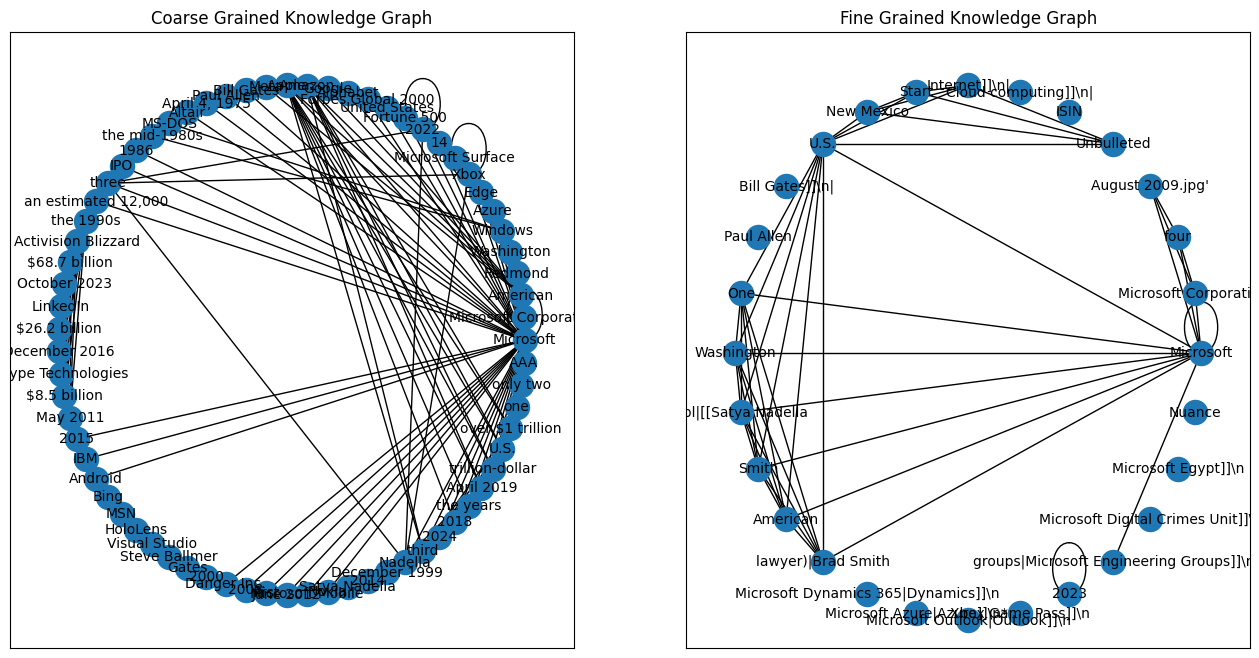

In [ ]:
import spacy
import requests
import wptools
import networkx as nx
import matplotlib.pyplot as plt
from transformers import RobertaTokenizer, RobertaModel
import torch
import torch.nn.functional as F
from torch_geometric.data import Data
from torch_geometric.nn import GATConv
import numpy as np
import wikipediaapi

# Loading Spacy model
nlp = spacy.load("en_core_web_sm")

# Sample news text
news_text = "Microsoft is the largest software company"

def get_wikipedia_url(entity):
    url = f"https://en.wikipedia.org/wiki/{entity.replace(' ', '_')}"
    return url

def get_wikipedia_summary(entity):
    url = f"https://en.wikipedia.org/api/rest_v1/page/summary/{entity.replace(' ', '_')}"
    response = requests.get(url)
    if response.status_code == 200:
        data = response.json()
        return data.get('extract')
    return None

def augment_news_with_entities(news_text, entity_summaries):
    augmented_text = news_text
    for entity, summary in entity_summaries.items():
        if summary:
            augmented_text += f"\n\n{entity}: {summary}"
    return augmented_text

def fetch_wikipedia_summary(topic):
    wiki = wikipediaapi.Wikipedia('MyWikiFetcher/1.0 (nilegupta2001@gmail.com)')
    page = wiki.page(topic)
    if page.exists():
        return page.summary
    return None

def get_infobox(title):
    try:
        page = wptools.page(title)
        page.get_parse()
        infobox = page.data.get('infobox')
        return infobox
    except:
        return None

def get_roberta_embeddings(text):
    inputs = tokenizer(text, return_tensors='pt', truncation=True, padding=True, max_length=512)
    with torch.no_grad():
        outputs = model(**inputs)
    return outputs.last_hidden_state.mean(dim=1).squeeze().numpy()

# Loading RoBERTa tokenizer and model
tokenizer = RobertaTokenizer.from_pretrained('roberta-base')
model = RobertaModel.from_pretrained('roberta-base')

# Extracting entities from the news text
doc = nlp(news_text)
entities = [(ent.text, ent.label_) for ent in doc.ents]

# Coarse-Grained Knowledge Graph
coarse_grained_summaries = {entity: fetch_wikipedia_summary(entity) for entity, label in entities}
augmented_news_coarse = augment_news_with_entities(news_text, coarse_grained_summaries)
doc_coarse = nlp(augmented_news_coarse)
entities_coarse = [(ent.text, ent.label_) for ent in doc_coarse.ents]
linked_entities_coarse = {entity: get_wikipedia_url(entity) for entity, label in entities_coarse}

G_coarse = nx.Graph()

for entity, url in linked_entities_coarse.items():
    embedding = get_roberta_embeddings(entity)
    G_coarse.add_node(entity, url=url, embedding=embedding)

for sent in doc_coarse.sents:
    sent_entities = [ent.text for ent in sent.ents]
    for i, entity1 in enumerate(sent_entities):
        for entity2 in sent_entities[i+1:]:
            if G_coarse.has_node(entity1) and G_coarse.has_node(entity2):
                G_coarse.add_edge(entity1, entity2)

# Fine-Grained Knowledge Graph
fine_grained_infoboxes = {entity: get_infobox(entity) for entity, label in entities}
augmented_news_fine = augment_news_with_entities(news_text, fine_grained_infoboxes)
doc_fine = nlp(augmented_news_fine)
entities_fine = [(ent.text, ent.label_) for ent in doc_fine.ents]
linked_entities_fine = {entity: get_wikipedia_url(entity) for entity, label in entities_fine}

G_fine = nx.Graph()

for entity, url in linked_entities_fine.items():
    embedding = get_roberta_embeddings(entity)
    G_fine.add_node(entity, url=url, embedding=embedding)

for sent in doc_fine.sents:
    sent_entities = [ent.text for ent in sent.ents]
    for i, entity1 in enumerate(sent_entities):
        for entity2 in sent_entities[i+1:]:
            if G_fine.has_node(entity1) and G_fine.has_node(entity2):
                G_fine.add_edge(entity1, entity2)

# Convert adjacency matrices to edge index format required by PyTorch Geometric
# Convert node names to numeric indices for both graphs
node_to_idx_coarse = {node: idx for idx, node in enumerate(G_coarse.nodes())}
edge_list_coarse = nx.to_edgelist(G_coarse)
edge_index_coarse = torch.tensor([[node_to_idx_coarse[u], node_to_idx_coarse[v]] for u, v, _ in edge_list_coarse], dtype=torch.long).t().contiguous()

node_to_idx_fine = {node: idx for idx, node in enumerate(G_fine.nodes())}
edge_list_fine = nx.to_edgelist(G_fine)
edge_index_fine = torch.tensor([[node_to_idx_fine[u], node_to_idx_fine[v]] for u, v, _ in edge_list_fine], dtype=torch.long).t().contiguous()

# Convert node features to torch tensor for both graphs
node_features_coarse = np.array([node[1]['embedding'] for node in G_coarse.nodes(data=True)])
node_features_coarse = torch.tensor(node_features_coarse, dtype=torch.float)

node_features_fine = np.array([node[1]['embedding'] for node in G_fine.nodes(data=True)])
node_features_fine = torch.tensor(node_features_fine, dtype=torch.float)

# Create PyTorch Geometric data objects for both graphs
data_coarse = Data(x=node_features_coarse, edge_index=edge_index_coarse)
data_fine = Data(x=node_features_fine, edge_index=edge_index_fine)

# Define GAT model
class GATModel(torch.nn.Module):
    def __init__(self, in_dim, hidden_dim, out_dim, num_heads):
        super(GATModel, self).__init__()
        self.conv1 = GATConv(in_dim, hidden_dim, heads=num_heads, dropout=0.6)
        self.conv2 = GATConv(hidden_dim * num_heads, out_dim, heads=1, dropout=0.6)

    def forward(self, data):
        x, edge_index = data.x, data.edge_index
        x = F.dropout(x, p=0.6, training=self.training)
        x = F.elu(self.conv1(x, edge_index))
        x = F.dropout(x, p=0.6, training=self.training)
        x = self.conv2(x, edge_index)
        return x

# Initialize the model
in_dim = node_features_coarse.shape[1]
hidden_dim = 96
out_dim = 768
num_heads = 8

model = GATModel(in_dim, hidden_dim, out_dim, num_heads)

model.eval()
with torch.no_grad():
    contextual_vectors_coarse = model(data_coarse)
    contextual_vectors_fine = model(data_fine)

print("Contextual Vectors shape (Coarse):", contextual_vectors_coarse.shape)
print("Contextual Vectors (Coarse):", contextual_vectors_coarse)
print("Contextual Vectors shape (Fine):", contextual_vectors_fine.shape)
print("Contextual Vectors (Fine):", contextual_vectors_fine)

# Plot the graphs side by side
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 8))

pos_coarse = nx.circular_layout(G_coarse)
pos_fine = nx.circular_layout(G_fine)

# Plot the coarse-grained knowledge graph
nx.draw_networkx_nodes(G_coarse, pos_coarse, node_size=300, ax=ax1)
nx.draw_networkx_edges(G_coarse, pos_coarse, width=1, ax=ax1)
nx.draw_networkx_labels(G_coarse, pos_coarse, font_size=10, font_family='sans-serif', ax=ax1)
ax1.set_title("Coarse Grained Knowledge Graph")

# Plot the fine-grained knowledge graph
nx.draw_networkx_nodes(G_fine, pos_fine, node_size=300, ax=ax2)
nx.draw_networkx_edges(G_fine, pos_fine, width=1, ax=ax2)
nx.draw_networkx_labels(G_fine, pos_fine, font_size=10, font_family='sans-serif', ax=ax2)
ax2.set_title("Fine Grained Knowledge Graph")

# Display the plots
plt.show()
